In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
from textblob import TextBlob

In [ ]:
dataset=pd.read_csv("/content/customer_support_tickets.csv")

In [ ]:
dataset.head()

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0


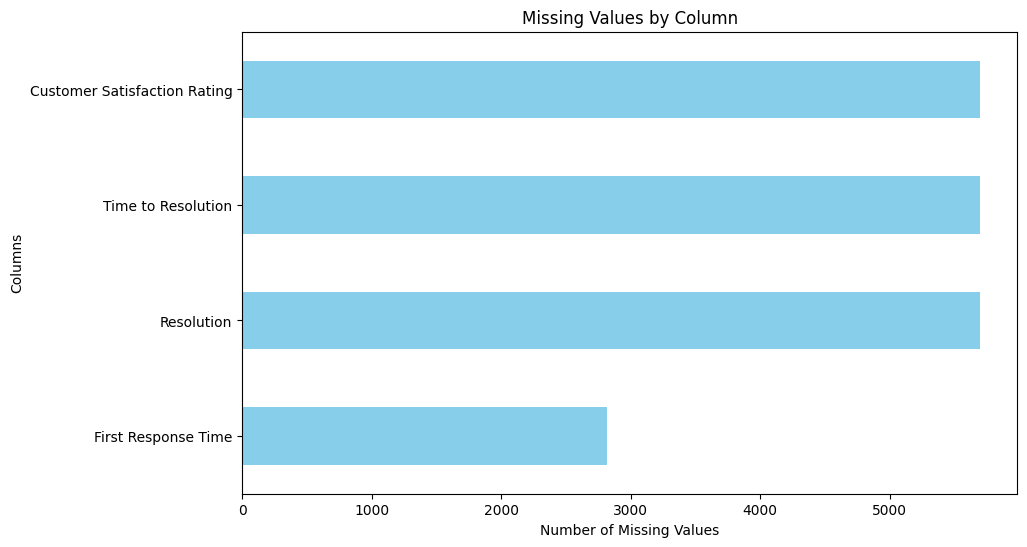

In [ ]:
#Overview of missing values
def plot_missing_values(df):
    missing_values = df.isnull().sum()
    missing_values = missing_values[missing_values > 0]
    missing_values.sort_values(inplace=True)

    missing_values.plot(kind='barh', color='skyblue', figsize=(10, 6))
    plt.title('Missing Values by Column')
    plt.xlabel('Number of Missing Values')
    plt.ylabel('Columns')
    plt.show()

plot_missing_values(dataset)

In [ ]:
#Summary Statistics
def numerical_summary(df):
    print("\nSummary Statistics for Numerical Columns:")
    print(df.describe())

numerical_summary(dataset)


Summary Statistics for Numerical Columns:
         Ticket ID  Customer Age  Customer Satisfaction Rating
count  8469.000000   8469.000000                   2769.000000
mean   4235.000000     44.026804                      2.991333
std    2444.934048     15.296112                      1.407016
min       1.000000     18.000000                      1.000000
25%    2118.000000     31.000000                      2.000000
50%    4235.000000     44.000000                      3.000000
75%    6352.000000     57.000000                      4.000000
max    8469.000000     70.000000                      5.000000


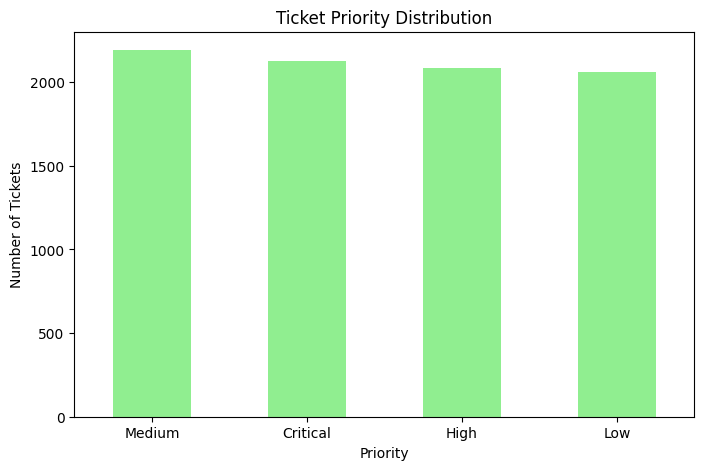

In [ ]:
#Ticket priority distribution
def ticket_priority_distribution(df):
    priority_counts = df['Ticket Priority'].value_counts()

    priority_counts.plot(kind='bar', color='lightgreen', figsize=(8, 5))
    plt.title('Ticket Priority Distribution')
    plt.xlabel('Priority')
    plt.ylabel('Number of Tickets')
    plt.xticks(rotation=0)
    plt.show()

ticket_priority_distribution(dataset)

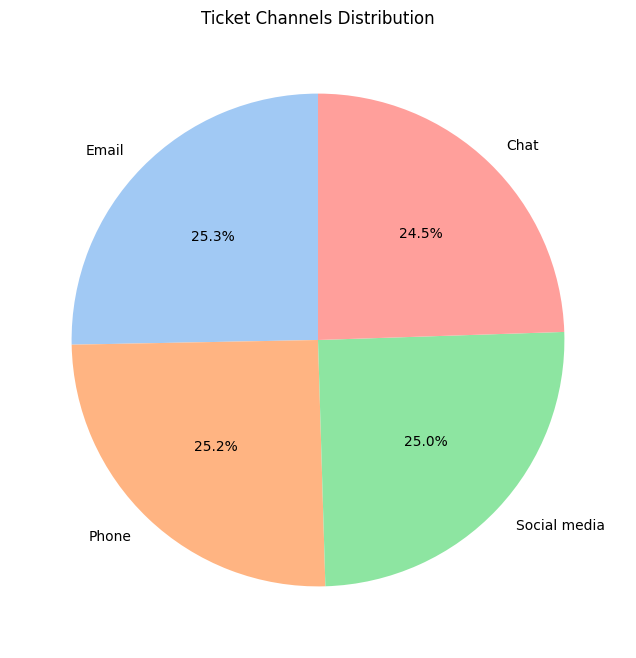

In [ ]:
#Channel Analysis
def channel_analysis(df):
    channel_counts = df['Ticket Channel'].value_counts()

    channel_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), startangle=90, colors=sns.color_palette('pastel'))
    plt.title('Ticket Channels Distribution')
    plt.ylabel('')
    plt.show()

channel_analysis(dataset)


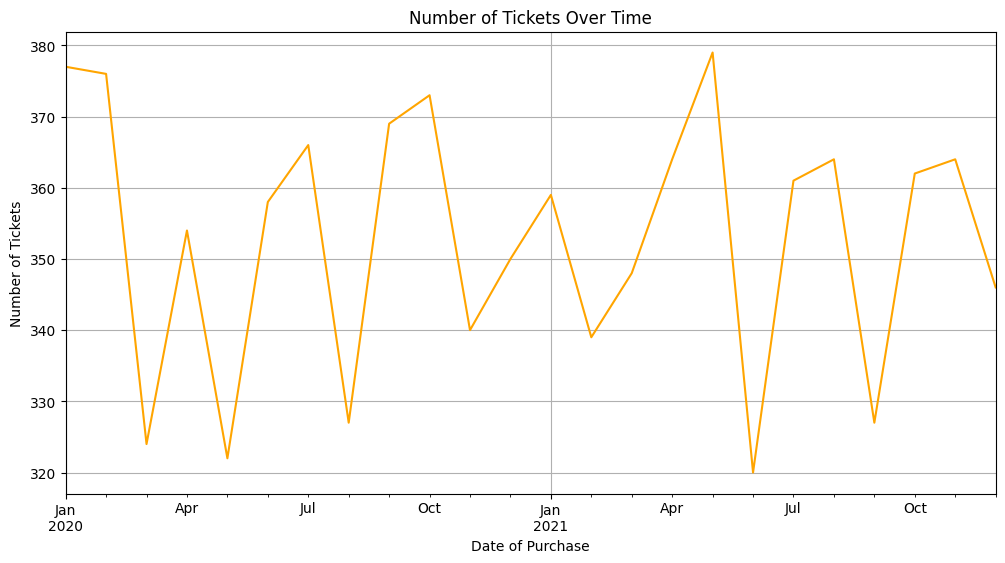

In [ ]:
#Time Analysis
def time_analysis(df):
    df['Date of Purchase'] = pd.to_datetime(df['Date of Purchase'], errors='coerce')
    time_trends = df.groupby(df['Date of Purchase'].dt.to_period('M')).size()

    time_trends.plot(kind='line', figsize=(12, 6), color='orange')
    plt.title('Number of Tickets Over Time')
    plt.xlabel('Date of Purchase')
    plt.ylabel('Number of Tickets')
    plt.grid()
    plt.show()

time_analysis(dataset)

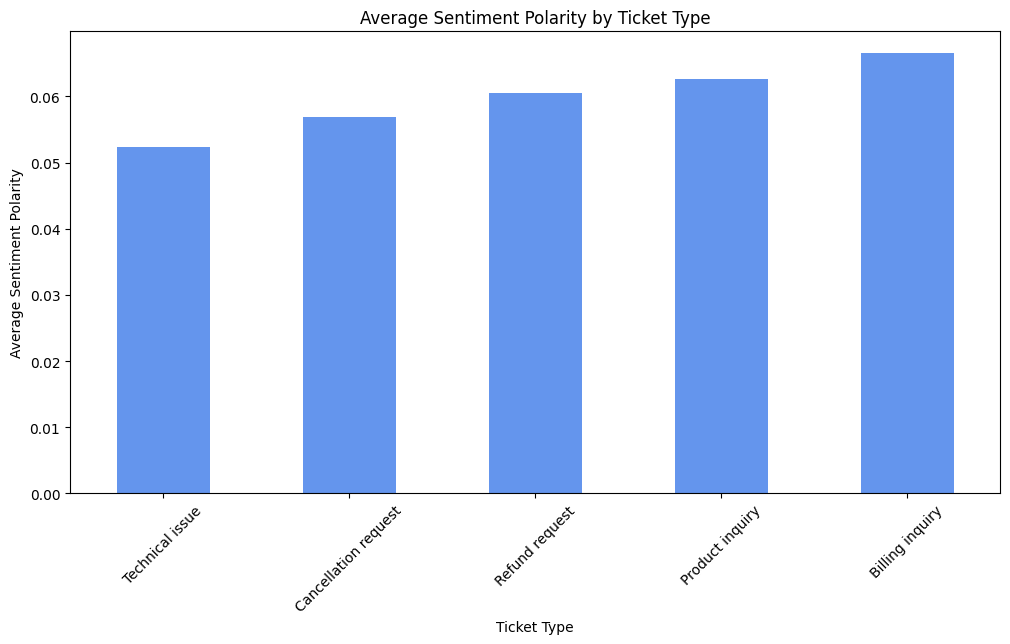


Sentiment Polarity by Ticket Type:
Ticket Type
Technical issue         0.052303
Cancellation request    0.056910
Refund request          0.060538
Product inquiry         0.062695
Billing inquiry         0.066508
Name: Sentiment Polarity, dtype: float64


In [ ]:
#Sentiment Analysis
def sentiment_by_type(df):
    if 'Ticket Description' in df.columns and 'Ticket Type' in df.columns:
        df['Sentiment Polarity'] = df['Ticket Description'].dropna().apply(lambda x: TextBlob(x).sentiment.polarity)
        sentiment_summary = df.groupby('Ticket Type')['Sentiment Polarity'].mean().sort_values()

        plt.figure(figsize=(12, 6))
        sentiment_summary.plot(kind='bar', color='cornflowerblue')
        plt.title('Average Sentiment Polarity by Ticket Type')
        plt.xlabel('Ticket Type')
        plt.ylabel('Average Sentiment Polarity')
        plt.xticks(rotation=45)
        plt.show()

        print("\nSentiment Polarity by Ticket Type:")
        print(sentiment_summary)

sentiment_by_type(dataset)


In [ ]:
#Response Automation
#Analyze the features of the automation
# Standardized Ticket Subjects and Description Analysis
subject_analysis = dataset['Ticket Subject'].value_counts()
description_patterns = dataset['Ticket Description'].str.extract(r'issue with (.*?)\.').value_counts()

# Priority and Type Analysis
priority_type_analysis = dataset.groupby(['Ticket Priority', 'Ticket Type']).size().reset_index(name='Counts')

# Resolution Suggestion Automation (finding common resolutions for similar subjects)
resolution_analysis = dataset.groupby('Ticket Subject')['Resolution'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None).reset_index(name='Most Common Resolution')

# Channel-Specific Automation
channel_analysis = dataset['Ticket Channel'].value_counts()

# Detecting delayed responses
dataset['First Response Time'] = pd.to_datetime(dataset['First Response Time'], errors='coerce')
dataset['Time to Resolution'] = pd.to_datetime(dataset['Time to Resolution'], errors='coerce')
dataset['Response Delay'] = (dataset['First Response Time'] - pd.to_datetime(dataset['Date of Purchase'], errors='coerce')).dt.total_seconds()
dataset['Resolution Delay'] = (dataset['Time to Resolution'] - dataset['First Response Time']).dt.total_seconds()

delayed_responses = dataset[dataset['Response Delay'] > 3600]  # Example: >1 hour delay
subject_analysis, description_patterns, priority_type_analysis, resolution_analysis, channel_analysis, delayed_responses[['Ticket ID', 'Response Delay']]


(Ticket Subject
 Refund request              576
 Software bug                574
 Product compatibility       567
 Delivery problem            561
 Hardware issue              547
 Battery life                542
 Network problem             539
 Installation support        530
 Product setup               529
 Payment issue               526
 Product recommendation      517
 Account access              509
 Peripheral compatibility    496
 Data loss                   491
 Cancellation request        487
 Display issue               478
 Name: count, dtype: int64,
 0                                                                                                                                   
 the {product_purchased}                                                                                                                 5868
 my {product_purchased}                                                                                                                   164
 further u

In [2]:
pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 12.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993222 sha256=0f29815c6ce49fd56a4d8a20c1a3587970b3d745663cd339c6cf9e3d4004f406
  Stored in directory: /root/.cache/pip/wheels/0a/f2/b2/e5ca405801e05eb7c8ed5b3b4bcf1fcabcd6272c167640072e
Successfully built langdetect


--- Language Identification ---
detected_language
en    1387
de     849
es     811
fr     477
pt     474
it       1
tl       1
Name: count, dtype: int64


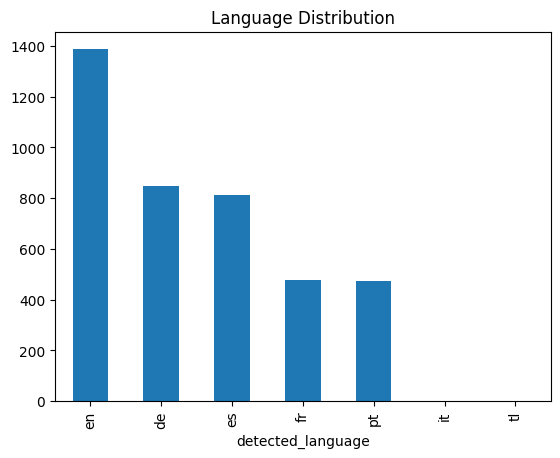

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from langdetect import detect
from langdetect.lang_detect_exception import LangDetectException
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset
file_path = '/content/dataset-tickets-multi-lang3-4k.csv'
data = pd.read_csv(file_path)

# 1. Language Identification
print("--- Language Identification ---")
def detect_language(text):
    try:
        return detect(text)
    except LangDetectException:
        return 'unknown'

# Check and validate language column
data['detected_language'] = data['body'].apply(lambda x: detect_language(str(x)))
language_distribution = data['detected_language'].value_counts()
print(language_distribution)

# Plot language distribution
language_distribution.plot(kind='bar', title='Language Distribution')
plt.show()

--- Categorization ---
type
Incident    1608
Request     1097
Problem      853
Change       442
Name: count, dtype: int64


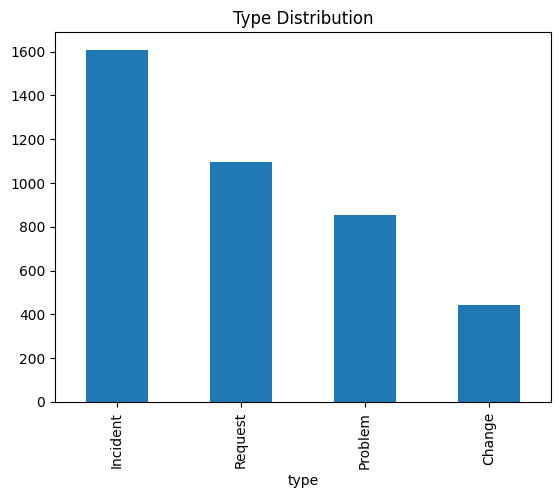

queue
Technical Support                  1317
Product Support                     690
Customer Service                    627
IT Support                          445
Billing and Payments                338
Returns and Exchanges               197
Service Outages and Maintenance     141
Sales and Pre-Sales                 137
General Inquiry                      55
Human Resources                      53
Name: count, dtype: int64


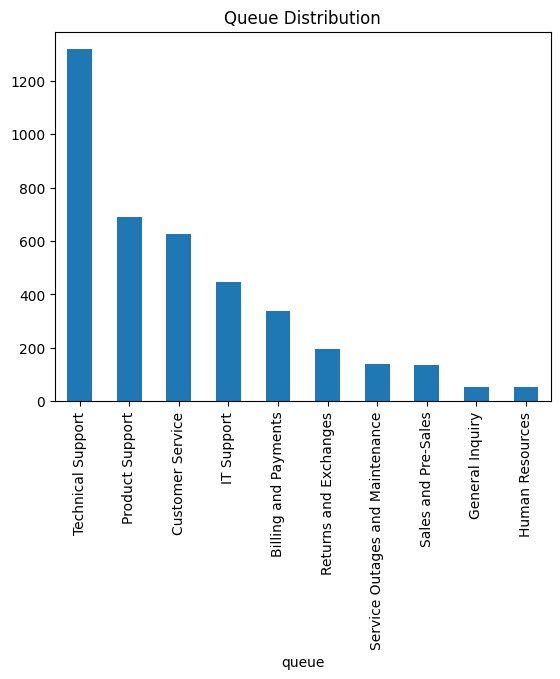

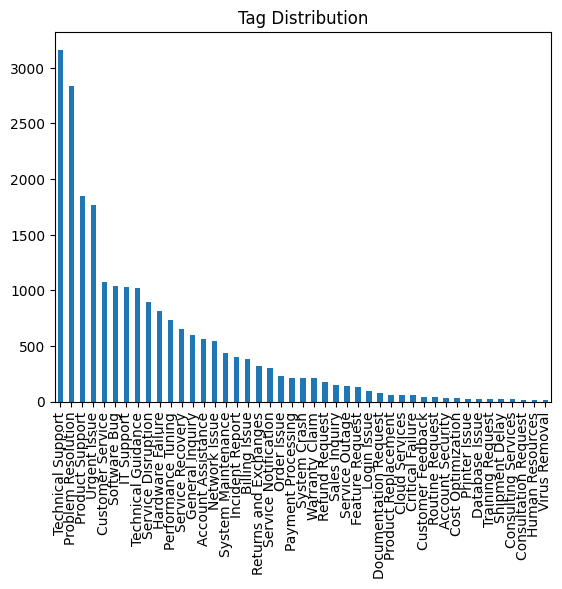

In [4]:
# 2. Categorization
print("--- Categorization ---")
categories = data['type'].value_counts()
print(categories)

# Plot type distribution
categories.plot(kind='bar', title='Type Distribution')
plt.show()

queues = data['queue'].value_counts()
print(queues)

# Plot queue distribution
queues.plot(kind='bar', title='Queue Distribution')
plt.show()

# Analyze tags
all_tags = pd.concat([data[f'tag_{i}'] for i in range(1, 10)])
tag_counts = all_tags.value_counts()
tag_counts = tag_counts[tag_counts > 10]  # Filter less frequent tags

# Plot tag distribution
tag_counts.plot(kind='bar', title='Tag Distribution')
plt.show()

--- Response Analysis ---


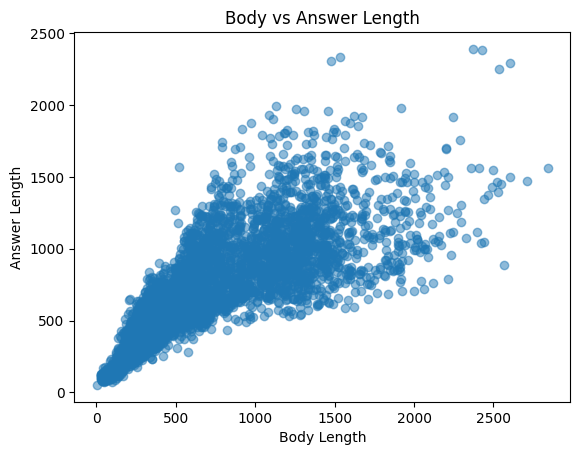

In [5]:
#3. Response Analysis
print("--- Response Analysis ---")
data['body_length'] = data['body'].apply(lambda x: len(str(x)))
data['answer_length'] = data['answer'].apply(lambda x: len(str(x)))

#Compare body and answer lengths
plt.scatter(data['body_length'], data['answer_length'], alpha=0.5)
plt.title('Body vs Answer Length')
plt.xlabel('Body Length')
plt.ylabel('Answer Length')
plt.show()

In [6]:
# 4.Recommendation Engine
print("--- Recommendation Engine ---")
# Prepare data for tag prediction
# Using tag_1 as the target for demonstration
vectorizer = CountVectorizer(max_features=1000, stop_words='english')
X = vectorizer.fit_transform(data['body'].fillna('')).toarray()
y = data['tag_1'].fillna('Unknown')

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest Classifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


--- Recommendation Engine ---
Accuracy: 0.6291666666666667
                       precision    recall  f1-score   support

   Account Assistance       0.00      0.00      0.00         3
        Billing Issue       0.92      0.77      0.84       103
     Critical Failure       0.00      0.00      0.00         1
    Customer Feedback       0.00      0.00      0.00         1
     Customer Service       0.50      0.03      0.05        38
          Data Breach       0.00      0.00      0.00         2
      Feature Request       0.00      0.00      0.00         3
      General Inquiry       0.00      0.00      0.00         1
     Hardware Failure       0.00      0.00      0.00         4
      Human Resources       0.00      0.00      0.00         1
           IT Support       0.55      0.17      0.26        95
      Incident Report       0.00      0.00      0.00         1
          Login Issue       0.00      0.00      0.00         9
        Network Issue       0.45      0.12      0.19      

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

In [7]:
pip install googletrans

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 2.5 MB/s eta 0:00:00


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [9]:
# Random Sampling
# Simple random sample of 10 rows
random_sample = data.sample(10)
print(random_sample)

# Stratified sampling based on a column
if 'category_column' in data.columns:
    stratified_sample = data.groupby('category_column', group_keys=False).apply(lambda x: x.sample(min(len(x), 5)))
    print(stratified_sample)

                                                subject  \
2998                                                NaN   
46                                                  NaN   
3897                         Urgente: Atraso na Entrega   
1770  Urgent: Flickering Screen Problem Reported by ...   
405   Crítico: Problema de congelación de la interfa...   
966    Laptop Overheating Issue During Video Calls Help   
621   Exchange Request: Canon PIXMA MG3620 Printer I...   
3970                               Consultation Inquiry   
2223  Asistencia requerida para la integración de Go...   
674   Problème d'installation signalé pour Windows 1...   

                                                   body  \
2998  Dear Tech Online Store Customer Support,\n\nI ...   
46    Prezado <name>,\n\nSentimos muito ao saber sob...   
3897  Prezada Equipe de Suporte ao Cliente, estou en...   
1770  Dear Customer Support Team, I am facing a cons...   
405   Estimado equipo de soporte,\n\nMe estoy ponien...